# Processamento de Linguagem Natural

In [92]:
"""
> Estuda problemas da geração e compreensão automática de línguas naturais. Empresas utilizam para realizar análises de comentários e avaliações de produtos.
> Iremos analizar os comentários dos clientes de uma empresa de comércio eletrônico brasileira. A empresa disponibilizou os dados de maneira pública no site:
https://www.kaggle.com/olistbr/brazilian-ecommerce
"""

'\n> Estuda problemas da geração e compreensão automática de línguas naturais. Empresas utilizam para realizar análises de comentários e avaliações de produtos.\n> Iremos analizar os comentários dos clientes de uma empresa de comércio eletrônico brasileira. A empresa disponibilizou os dados de maneira pública no site:\nhttps://www.kaggle.com/olistbr/brazilian-ecommerce\n'

## Importação das bibliotecas

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## NLTK conjunto para processamento de linguagem natural do python

In [94]:
import re, nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [95]:
review_df = pd.read_csv("olist_order_reviews_dataset.csv")
review_df.head()
review_df.shape

(99224, 7)

## Temos valores ausentes nos comentários e seus títulos

In [96]:
review_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

## Separando em dois campos de estudo: Vamos estudar separadamente o título e a descrição da avaliação

In [97]:
review_data_title = review_df['review_comment_title']
review_data = review_df.drop(['review_comment_title'], axis=1)

## Excluindo os valores nulos

In [98]:
review_data = review_data.dropna()
review_data_title = review_data_title.dropna()
review_data.shape

(40977, 6)

In [99]:
review_data = review_data.reset_index(drop=True)
review_data.head(3)

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
1,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
2,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


In [100]:
review_data.shape

(40977, 6)

In [101]:
review_data_title = review_data_title.reset_index(drop=True)
review_data_title.head(10)

0                  recomendo
1            Super recomendo
2    Não chegou meu produto 
3                      Ótimo
4                 Muito bom.
5                        Bom
6               Maravilhoso!
7           Entrega perfeita
8                      Ótimo
9                   MT lindo
Name: review_comment_title, dtype: object

In [102]:
review_data_title.shape

(11568,)

In [103]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Nayan
[nltk_data]     Couto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Nayan
[nltk_data]     Couto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [104]:
comments = []
stopwords = set(stopwords.words('portuguese'))

In [105]:
for words in review_data['review_comment_message']:
    only_letters = re.sub("[^a-zA-Z]", " ", words) # Somente letras
    tokens = nltk.word_tokenize(only_letters) # Tokenizar sentenças
    lower_case = [l.lower() for l in tokens] # Transformando em minúscula
    filtered_result = list(filter(lambda l: l not in stopwords, lower_case)) # Removendo stopwords
    comments.append(" ".join(filtered_result)) # Transformando em string

## Criando nuvem de palavras dos comentários

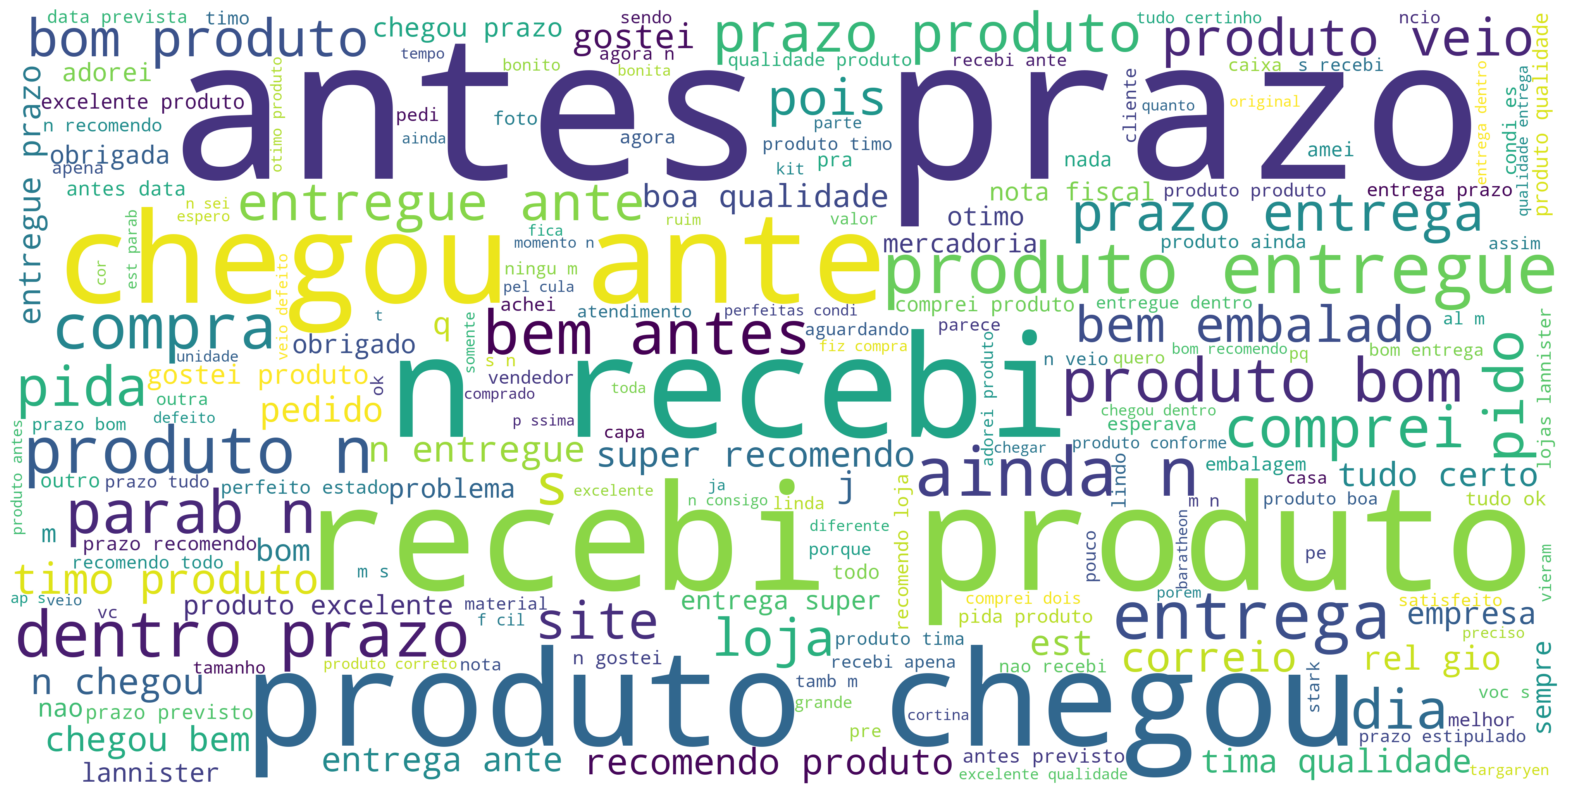

In [106]:
unique_string = (" ").join(comments)
wordcloud = WordCloud(width = 4000, height = 2000, background_color='white').generate(unique_string)
plt.figure(figsize=(20, 21))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()